In [1]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
# currently: 0, 0
circuit.x(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
# 1, 0
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
# 1, 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

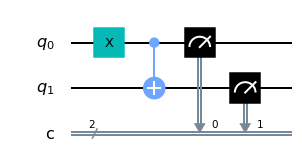

In [2]:
circuit.draw(output="mpl")

In [3]:
from qiskit import IBMQ

IBMQ.save_account(open('token.txt', 'r').read())

configrc.store_credentials:WARNING:2020-09-09 15:46:43,890: Credentials already present. Set overwrite=True to overwrite.


In [4]:
IBMQ.load_account()

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider("ibm-q")

In [6]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 5 queued and simulated qubits
ibmqx2 has 11 queued and 5 qubits
ibmq_16_melbourne has 15 queued and 15 qubits
ibmq_vigo has 4 queued and 5 qubits
ibmq_ourense has 3 queued and 5 qubits
ibmq_valencia has 9 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 4 queued and 5 qubits
ibmq_essex has 5 queued and 5 qubits
ibmq_armonk has 9 queued and 1 qubits
ibmq_santiago has 12 queued and 5 qubits


In [7]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_ourense")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


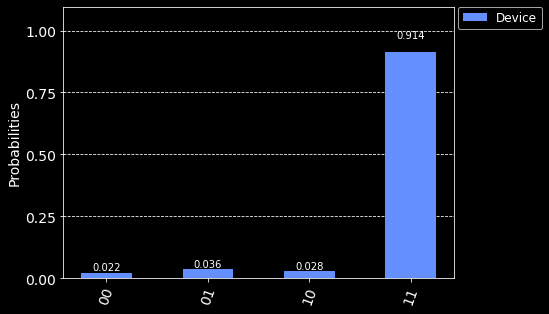

In [8]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

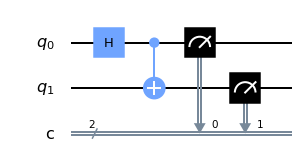

In [11]:
circuit = q.QuantumCircuit(2,2)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1
circuit.draw(output="mpl")

Job Status: job has successfully run


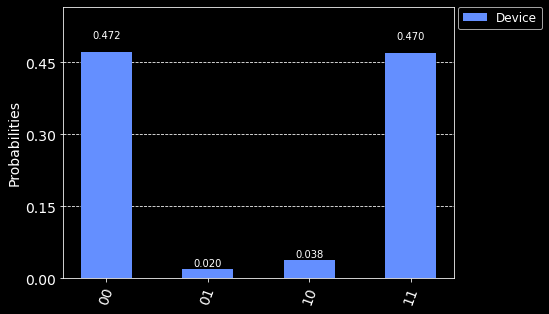

In [13]:
backend = provider.get_backend("ibmq_ourense")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [14]:
from qiskit import Aer # simulator framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run


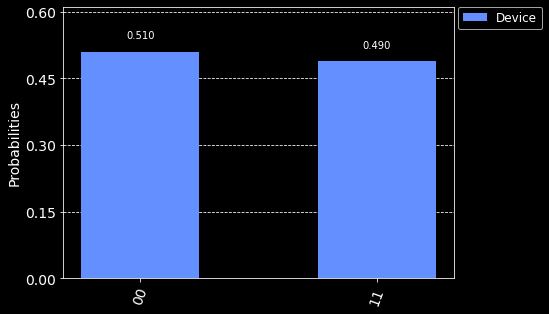

In [15]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [17]:
circuit.n_qubits

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  """Entry point for launching an IPython kernel.


2